In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df_train = pd.read_csv("Train.csv")
df_test = pd.read_csv("Test.csv") 
df = pd.read_csv("Sample_submission.csv")
'''
train/test = 42%
'''

'\ntrain/test = 42%\n'

In [3]:
df_train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,1,1,2.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1759,40,200,5.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1760,96,218,2.2708,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1761,16,81,5.0625,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train['Class'].value_counts()

0    1620
1     143
Name: Class, dtype: int64

In [5]:
df_test

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558
0,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,108.0,179.0,1.6574,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60.0,120.0,2.0000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
752,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
753,12.0,101.0,8.4166,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
754,31.0,88.0,2.8387,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# split features and label
X = df_train.drop(['Class'], axis=1)
y = df_train['Class']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.33, random_state=42)

In [7]:
X_train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
560,40,40,1.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1234,25,133,5.3200,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
593,43,230,5.3488,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1054,135,200,1.4814,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
341,120,120,1.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,27,57,2.1111,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294,58,285,4.9137,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,11,96,8.7272,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1459,1,1,2.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
from sklearn import preprocessing
# normalized_X = preprocessing.normalize(X)
# x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.fit_transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)  # Sclaed data
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)  

In [9]:
X_train_scaled

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,0.061033,0.063830,0.016642,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.037559,0.216039,0.088644,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.065728,0.374795,0.089124,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.209703,0.325696,0.024666,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.186228,0.194763,0.016642,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,0.040689,0.091653,0.035161,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1177,0.089202,0.464812,0.081872,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1178,0.015649,0.155483,0.145432,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1179,0.000000,0.000000,0.033309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<h3>Feature extraction with Autoencoder</h3>

In [10]:

# train autoencoder for classification with no compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
n_inputs = 1559
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(100)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = 100
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(100)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# # define autoencoder model
# model = Model(inputs=visible, outputs=output)
# # compile autoencoder model
# model.compile(optimizer='adam', loss='mse')

# # fit the autoencoder model to reconstruct input
# history = model.fit(X_train_scaled, X_train_scaled, epochs=200, batch_size=16, verbose=2, validation_data=(X_test_scaled, X_test_scaled))
# # plot loss
# pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='test')
# pyplot.legend()
# pyplot.show()
# # define an encoder model (without the decoder)
# encoder = Model(inputs=visible, outputs=bottleneck)

# # save the encoder to file
# encoder.save('encoder.h5')

2021-09-25 11:40:32.059782: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-25 11:40:32.446316: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 299 MB memory:  -> device: 0, name: NVIDIA TITAN RTX, pci bus id: 0000:65:00.0, compute capability: 7.5


2021-09-25 11:40:32.635468: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
74/74 - 2s - loss: 0.0673 - val_loss: 0.0083
Epoch 2/20
74/74 - 1s - loss: 0.0120 - val_loss: 0.0079
Epoch 3/20
74/74 - 1s - loss: 0.0099 - val_loss: 0.0079
Epoch 4/20
74/74 - 1s - loss: 0.0101 - val_loss: 0.0074
Epoch 5/20
74/74 - 1s - loss: 0.0103 - val_loss: 0.0081
Epoch 6/20
74/74 - 1s - loss: 0.0104 - val_loss: 0.0093
Epoch 7/20
74/74 - 1s - loss: 0.0096 - val_loss: 0.0106
Epoch 8/20
74/74 - 1s - loss: 0.0097 - val_loss: 0.0102
Epoch 9/20
74/74 - 1s - loss: 0.0092 - val_loss: 0.0086
Epoch 10/20
74/74 - 1s - loss: 0.0087 - val_loss: 0.0087
Epoch 11/20
74/74 - 1s - loss: 0.0086 - val_loss: 0.0093
Epoch 12/20
74/74 - 1s - loss: 0.0080 - val_loss: 0.0080
Epoch 13/20
74/74 - 1s - loss: 0.0076 - val_loss: 0.0089
Epoch 14/20
74/74 - 1s - loss: 0.0076 - val_loss: 0.0079
Epoch 15/20
74/74 - 1s - loss: 0.0074 - val_loss: 0.0073
Epoch 16/20
74/74 - 1s - loss: 0.0072 - val_loss: 0.0070
Epoch 17/20
74/74 - 1s - loss: 0.0072 - val_loss: 0.0077
Epoch 18/20
74/74 - 1s - loss: 0.0070 - 

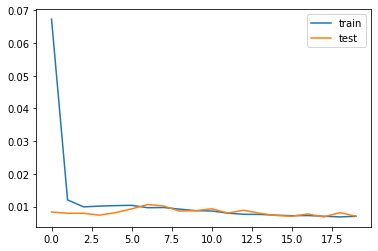

In [11]:
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

# fit the autoencoder model to reconstruct input
history = model.fit(X_train_scaled, X_train_scaled, epochs=20, batch_size=16, verbose=2, validation_data=(X_test_scaled, X_test_scaled))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)

# save the encoder to file
encoder.save('encoder.h5')

In [12]:
from tensorflow.keras.models import load_model
encoder = load_model('encoder.h5')

In [13]:
extract = Model(visible, e)

extracted_train = extract.predict(x=X_train_scaled)

In [14]:
extracted_train = pd.DataFrame(data = extracted_train)
extracted_train

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.146176,-0.099023,0.618734,0.415614,-0.111395,-0.009800,-0.182354,0.003285,0.465658,0.073430,...,0.729687,0.625364,-0.195346,0.515407,-0.182141,-0.049468,0.291073,-0.170994,0.140061,-0.162901
1,-0.102579,-0.062921,0.498367,-0.032634,-0.052894,-0.019878,-0.141266,0.174271,0.617508,-0.089583,...,0.053767,1.055254,-0.195037,0.551900,-0.226087,-0.106173,0.706783,-0.276111,-0.047011,-0.384352
2,4.157242,4.547595,-0.115552,3.247695,3.777225,-0.871727,-0.041454,4.009262,-1.069148,-0.777097,...,-0.011561,0.067460,-0.123180,2.578346,-0.137896,1.795595,1.689947,-1.487792,-0.652245,-0.359700
3,1.391782,-0.086833,2.160153,0.005736,-0.166476,0.720586,-0.148071,0.544984,-0.758292,2.280260,...,1.735407,-0.723441,-0.200023,-0.165646,-0.172204,0.347581,1.122141,-0.313209,1.722215,-0.274968
4,-0.196977,-0.151918,-0.008381,1.251306,-0.184112,0.608825,-0.171313,-0.048869,0.359121,0.091762,...,-0.041077,0.198082,-0.179433,1.076532,-0.125954,-0.074615,0.250969,-0.126841,0.140185,-0.178039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,-0.091198,-0.066154,0.425716,0.199451,-0.039585,-0.183407,-0.257482,0.021092,-0.051375,-0.030003,...,0.413050,0.656720,-0.266520,0.271728,-0.247587,0.488518,0.372548,-0.149159,-0.078585,-0.210945
1177,-0.093985,-0.162527,0.240874,0.753487,-0.143703,0.189096,-0.093907,-0.079299,0.204773,0.005699,...,0.269872,0.658255,-0.074816,0.272659,-0.079539,-0.066440,0.344513,-0.006036,0.269356,-0.093052
1178,3.082176,-0.336820,-1.044199,-0.709479,-0.051962,0.158183,5.765675,-0.624767,0.443716,-0.674017,...,-1.026896,-0.623007,5.249770,-0.900815,4.125092,-0.514253,-0.712808,5.192871,2.721692,5.653451
1179,-0.091143,1.717571,1.107264,-0.013217,1.180949,-0.438475,-0.012397,0.951299,-0.136362,-0.074708,...,-0.266908,-0.087871,-0.053798,1.196435,-0.366714,0.790642,1.127554,-0.476521,-0.398255,-0.328681


In [15]:
extracted_test = extract.predict(x=X_test_scaled)

In [16]:
extracted_test = pd.DataFrame(data = extracted_test)
extracted_test

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.047958,-0.160946,0.049282,0.096516,-0.143938,0.780316,0.370949,-0.117276,0.449468,0.255247,...,-0.039694,0.242615,0.529760,-0.223933,0.071358,0.093867,-0.034617,0.779481,-0.207343,0.235723
1,-0.055464,-0.048993,0.327000,0.468452,-0.069356,-0.173813,-0.204679,0.015550,0.320918,0.735250,...,0.328391,0.474391,-0.195056,0.121651,-0.170254,0.986871,0.034225,-0.152607,-0.133686,-0.223595
2,-0.137452,-0.167612,0.202262,0.530185,-0.177788,-0.042569,-0.185917,-0.093576,0.560077,0.869184,...,0.061076,0.251800,-0.191245,0.500508,-0.151489,0.764500,0.334899,-0.079983,0.168906,-0.184314
3,1.566871,-0.184628,-0.525114,-0.367189,-0.161513,1.679512,1.692637,-0.264366,0.903140,-0.349110,...,-0.405996,-0.219246,1.658949,-0.412260,1.761747,-0.330777,-0.362408,2.169833,1.528774,1.779696
4,0.041096,1.117745,0.665916,0.269833,1.068450,-0.133045,-0.151180,1.556999,-0.186320,0.260711,...,-0.025810,-0.080581,-0.182416,0.226042,-0.288862,1.160782,0.916477,-0.349816,-0.350437,-0.212411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,1.392999,-0.237578,-0.714895,-0.361925,-0.127025,1.196658,2.303926,-0.298113,1.518739,-0.504588,...,-0.428423,-0.419303,2.489393,-0.583585,2.256938,-0.445478,-0.304869,2.273045,0.780846,2.357833
578,1.731273,-0.154895,-0.720633,-0.247180,-0.058150,2.558704,3.927528,-0.328085,0.246614,-0.580245,...,-0.590485,-0.326403,4.275719,-0.766632,3.419755,-0.285335,-0.515808,3.657821,0.350508,3.825887
579,-0.014681,-0.136491,0.316204,0.404778,-0.144970,0.003539,-0.173190,-0.048092,0.291569,0.400655,...,0.428794,0.508195,-0.165369,0.289351,-0.156456,0.018692,0.470273,-0.097947,-0.005125,-0.167736
580,-0.089231,-0.108257,0.330358,0.338523,-0.061265,-0.099175,-0.238747,0.006754,0.034207,-0.004387,...,0.377203,0.611444,-0.248507,0.277667,-0.170505,0.269762,0.344543,-0.143346,-0.056269,-0.196333


In [17]:
extracted_train_scaled = min_max_scaler.fit_transform(extracted_train)
extracted_test_scaled = min_max_scaler.fit_transform(extracted_test)
extracted_test_scaled = pd.DataFrame(extracted_test_scaled)  # Sclaed data
extracted_train_scaled = pd.DataFrame(extracted_train_scaled) 


In [18]:
extracted_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.278138,0.052423,0.332866,0.305429,0.060874,0.243437,0.041942,0.117721,0.199437,0.263781,...,0.435845,0.287768,0.077296,0.287205,0.082388,0.127299,0.204899,0.196333,0.316982,0.064618
1,0.233370,0.058066,0.310652,0.198331,0.068617,0.241192,0.048225,0.142948,0.218687,0.223504,...,0.286565,0.371117,0.077345,0.294152,0.074342,0.118703,0.279688,0.180660,0.272992,0.030633
2,1.000000,0.778674,0.197350,0.982087,0.575604,0.051390,0.063489,0.708749,0.004872,0.053633,...,0.272137,0.179598,0.088654,0.679913,0.090488,0.407017,0.456564,0.000000,0.130668,0.034416
3,0.502307,0.054328,0.617342,0.207499,0.053583,0.406176,0.047184,0.197642,0.044279,0.809045,...,0.657962,0.026254,0.076560,0.157558,0.084207,0.187493,0.354413,0.175129,0.689035,0.047419
4,0.216381,0.044156,0.217129,0.505098,0.051248,0.381274,0.043630,0.110027,0.185931,0.268311,...,0.265619,0.204924,0.079801,0.394023,0.092674,0.123487,0.197684,0.202916,0.317012,0.062294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,0.235418,0.057560,0.297243,0.253782,0.070379,0.204756,0.030453,0.120348,0.133893,0.238225,...,0.365914,0.293847,0.066095,0.240818,0.070406,0.208860,0.219557,0.199588,0.265567,0.057245
1177,0.234917,0.042497,0.263130,0.386156,0.056597,0.287754,0.055468,0.105537,0.166365,0.247046,...,0.334293,0.294145,0.096266,0.240995,0.101171,0.124726,0.214513,0.220928,0.347387,0.075337
1178,0.806523,0.015256,0.025963,0.036615,0.068741,0.280866,0.951549,0.025061,0.196655,0.079102,...,0.047897,0.045727,0.934259,0.017609,0.870935,0.056836,0.024295,0.996077,0.924067,0.957224
1179,0.235428,0.336350,0.423027,0.202970,0.231939,0.147924,0.067932,0.257588,0.123120,0.227179,...,0.215743,0.149482,0.099573,0.416848,0.048597,0.254662,0.355387,0.150779,0.190395,0.039176


<h3>Build VAE network for training</h3>

In [19]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from keras.metrics import binary_crossentropy
from tensorflow.keras.callbacks import LearningRateScheduler

import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
import tensorflow as tf


m = 64
n_z = 2
n_epoch = 10


# Q(z|X) -- encoder
inputs = Input(shape=(100,))
h_q = Dense(512, activation='relu')(inputs)
h_q = Dense(1024, activation='relu')(inputs)
decoder_hidden = Dense(2048, activation='relu')
mu = Dense(n_z, activation='linear')(h_q)
log_sigma = Dense(n_z, activation='linear')(h_q)


def sample_z(args):
#     z_mean, z_log_sigma = args
#     batch_size = tf.shape(z_mean)[0]
#     epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
#     return z_mean + K.exp(0.5 * z_log_sigma) * epsilon

    mu, log_sigma = args
    batch_size = tf.shape(mu)[0]
    eps = K.random_normal(shape=(batch_size, n_z), mean=0., stddev=1.)
    return mu + K.exp(log_sigma / 2) * eps


# Sample z ~ Q(z|X)
z = Lambda(sample_z)([mu, log_sigma])

# P(X|z) -- decoder
decoder_hidden = Dense(2048, activation='relu')
decoder_hidden = Dense(1024, activation='relu')
decoder_hidden = Dense(512, activation='relu')
decoder_out = Dense(100, activation='sigmoid')

h_p = decoder_hidden(z)
outputs = decoder_out(h_p)

# Overall VAE model, for reconstruction and training
vae = Model(inputs, outputs)

# Encoder model, to encode input into latent variable
# We use the mean as the output as it is the center point, the representative of the gaussian
encoder = Model(inputs, mu)

# Generator model, generate new data given latent variable z
d_in = Input(shape=(n_z,))
d_h = decoder_hidden(d_in)
d_out = decoder_out(d_h)
decoder = Model(d_in, d_out)

def vae_loss(recon_x, x):
    """ Calculate loss = reconstruction loss + KL loss for each data in minibatch """
    # E[log P(X|z)]
    recon = K.sum(K.binary_crossentropy(recon_x, x), axis=1)
    # D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
    kl = 0.5 * K.sum(K.exp(log_sigma) + K.square(mu) - 1. - log_sigma, axis=1)

    return recon + kl

In [20]:
loss = vae_loss(inputs, outputs)

In [21]:
vae.compile(optimizer='adam', loss=vae_loss)
vae.fit(extracted_train_scaled, extracted_train_scaled, batch_size=m, epochs=100, validation_data=(extracted_test_scaled, extracted_test_scaled))

Train on 1181 samples, validate on 582 samples
Epoch 1/100
  64/1181 [>.............................] - ETA: 2s - loss: 69.4293

2021-09-25 11:45:25.325734: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 299 MB memory:  -> device: 0, name: NVIDIA TITAN RTX, pci bus id: 0000:65:00.0, compute capability: 7.5


1181/1181 [==============================] - 0s 226us/sample - loss: 63.4950 - val_loss: 56.7363
Epoch 2/100
1181/1181 [==============================] - 0s 77us/sample - loss: 54.6922 - val_loss: 52.2616
Epoch 3/100
  64/1181 [>.............................] - ETA: 0s - loss: 53.3754

/home/zh314/jupyter_notebook/jupyterenv/lib/python3.7/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1181/1181 [==============================] - 0s 89us/sample - loss: 52.1066 - val_loss: 50.6215
Epoch 4/100
1181/1181 [==============================] - 0s 90us/sample - loss: 50.9294 - val_loss: 49.9501
Epoch 5/100
1181/1181 [==============================] - 0s 88us/sample - loss: 50.2149 - val_loss: 49.1087
Epoch 6/100
1181/1181 [==============================] - 0s 89us/sample - loss: 49.6932 - val_loss: 48.8438
Epoch 7/100
1181/1181 [==============================] - 0s 89us/sample - loss: 49.3333 - val_loss: 48.6838
Epoch 8/100
1181/1181 [==============================] - 0s 87us/sample - loss: 49.1532 - val_loss: 48.4980
Epoch 9/100
1181/1181 [==============================] - 0s 88us/sample - loss: 49.0836 - val_loss: 48.3608
Epoch 10/100
1181/1181 [==============================] - 0s 87us/sample - loss: 48.9874 - val_loss: 48.2265
Epoch 11/100
1181/1181 [==============================] - 0s 88us/sample - loss: 48.8859 - val_loss: 48.1942
Epoch 12/100
1181/1181 [==============

1181/1181 [==============================] - 0s 80us/sample - loss: 47.9270 - val_loss: 47.1222
Epoch 79/100
1181/1181 [==============================] - 0s 73us/sample - loss: 47.9245 - val_loss: 47.1071
Epoch 80/100
1181/1181 [==============================] - 0s 73us/sample - loss: 47.9016 - val_loss: 47.2531
Epoch 81/100
1181/1181 [==============================] - 0s 64us/sample - loss: 47.9432 - val_loss: 47.1932
Epoch 82/100
1181/1181 [==============================] - 0s 69us/sample - loss: 47.9268 - val_loss: 47.2035
Epoch 83/100
1181/1181 [==============================] - 0s 71us/sample - loss: 47.9528 - val_loss: 47.1903
Epoch 84/100
1181/1181 [==============================] - 0s 68us/sample - loss: 47.9855 - val_loss: 47.1774
Epoch 85/100
1181/1181 [==============================] - 0s 79us/sample - loss: 47.9104 - val_loss: 47.1791
Epoch 86/100
1181/1181 [==============================] - 0s 85us/sample - loss: 47.9483 - val_loss: 47.1237
Epoch 87/100
1181/1181 [========

In [22]:
def mse_error(x_explain):
        """
        Sort all records in x_explain by their MSE calculated according to their prediction by the trained VAE
        and return the top num_anomalies_to_explain (its value given by the user at class initialization) records.
        Args:
            x_explain (data frame): Set of records we want to explain the most anomalous ones from it.
        Returns:
            list: List of index of the top num_anomalies_to_explain records with highest MSE that will be explained.
        """
        
        predictions = vae.predict(x_explain)
        square_errors = np.power(x_explain - predictions, 2)
        mse_series = pd.Series(np.mean(square_errors, axis=1))

        most_anomal_trx = mse_series.sort_values(ascending=False)
        columns = ["id", "mse_all_columns"]
        columns.extend(["squared_error_" + x for x in list(str(x_explain.columns))])
        items = []
        for x in most_anomal_trx.iteritems():
            item = [x[0], x[1]]
            item.extend(square_errors.loc[x[0]])
            items.append(item)
        
   
#         df_anomalies = pd.DataFrame(items, columns=columns)
#         df_anomalies.set_index("id", inplace=True)

#         top_anomalies_to_explain = df_anomalies.head(629).index
#         return top_anomalies_to_explain
        return items

In [23]:
error = mse_error(extracted_test_scaled)

In [24]:
error

[[416,
  0.10804710537195206,
  0.09214018285274506,
  0.15566878020763397,
  0.19766578078269958,
  0.07869508117437363,
  0.19416216015815735,
  0.011664059944450855,
  1.2181926649645902e-05,
  0.056853048503398895,
  0.6430889964103699,
  0.09283512830734253,
  0.056564539670944214,
  0.5605241656303406,
  0.001694951788522303,
  0.0023930794559419155,
  0.08230363577604294,
  0.003204670501872897,
  0.08854451030492783,
  0.04979197308421135,
  0.07583554834127426,
  0.5027673840522766,
  0.0008659425657242537,
  0.02757750265300274,
  0.4096733033657074,
  0.08661828935146332,
  0.26015642285346985,
  0.006021939683705568,
  0.041590429842472076,
  0.15834446251392365,
  1.356883058178937e-05,
  0.6631240844726562,
  0.031271230429410934,
  0.00030834542121738195,
  0.039151232689619064,
  0.07735150307416916,
  0.05396094173192978,
  0.017744967713952065,
  0.16940398514270782,
  0.13355238735675812,
  0.016884319484233856,
  0.42192986607551575,
  0.08130837976932526,
  0.02029

In [25]:
error_arr= np.array(error)

In [26]:
error_arr

array([[4.16000000e+02, 1.08047105e-01, 9.21401829e-02, ...,
        4.25083609e-03, 8.06047302e-03, 8.03637318e-04],
       [5.10000000e+02, 6.05013408e-02, 3.69145423e-02, ...,
        1.87337294e-03, 6.38436433e-03, 1.46641640e-03],
       [5.70000000e+01, 5.00520654e-02, 4.28055108e-01, ...,
        2.59246267e-02, 2.27047643e-03, 1.21921382e-03],
       ...,
       [2.67000000e+02, 7.85891782e-04, 1.69733539e-05, ...,
        1.02234517e-04, 1.58794620e-03, 3.91236390e-05],
       [1.45000000e+02, 7.72310654e-04, 2.81424673e-05, ...,
        6.74996118e-05, 1.84850907e-03, 4.43378813e-05],
       [1.20000000e+01, 7.70754879e-04, 7.05696511e-05, ...,
        8.25058160e-05, 9.50569520e-04, 1.71627798e-05]])

In [27]:
error_df = pd.DataFrame(error_arr)

In [28]:
test_error = error_df.iloc[:,0]
test_error

0      416.0
1      510.0
2       57.0
3      157.0
4      581.0
       ...  
577    309.0
578     31.0
579    267.0
580    145.0
581     12.0
Name: 0, Length: 582, dtype: float64

In [29]:
test_error = test_error.astype(int)

test_error_head = test_error.head(143)

test_error_head = test_error_head.to_numpy()

In [30]:
test_error_head

array([416, 510,  57, 157, 581,  16,  64, 297, 115, 302, 365,  34, 372,
       151, 132, 534, 155, 276,  75,  22, 122, 171, 426, 548, 478, 528,
       367,  24,   5, 293, 107,  45, 447, 522, 549, 341, 428, 425, 358,
       500, 489, 303, 491, 188,  17, 397, 423, 315, 571, 530, 170, 217,
        86, 196, 205, 261, 498, 133, 560, 185,  33, 540, 312, 495, 277,
       413, 403,  77, 369, 556, 383, 304, 497, 443, 103, 402, 287, 306,
       150,  71, 494, 202,  95, 278, 317, 247, 373, 361, 579, 475, 175,
       186, 435, 386, 182, 355, 316, 464, 504, 235, 211, 260, 167, 512,
       451, 388, 160, 473, 541, 519, 444, 109, 411, 117, 385,  14, 370,
       405, 273, 326, 238,  35,  53, 147, 377, 158,   8,  78, 477, 321,
       420, 237, 165, 138,   0, 118, 270, 469,  56,  96, 301, 437, 154])

In [31]:
anomaly = extracted_test_scaled.iloc[test_error_head]

In [32]:
anomaly

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
416,0.000000,0.651809,0.830191,0.012845,0.646220,0.100976,0.037650,0.486684,1.000000,0.000000,...,0.000000,0.402315,0.033119,0.834274,0.821432,1.000000,1.000000,0.109821,0.145011,0.031322
510,0.111781,0.629136,0.787353,0.005769,0.449863,0.091446,0.041396,0.212153,0.189907,0.072637,...,0.121726,0.157839,0.045858,0.149020,0.067405,0.069641,0.113337,0.135917,0.153633,0.024507
57,1.000000,0.664759,0.202961,0.998464,0.510299,0.080101,0.077994,0.668985,0.001416,0.046960,...,0.238141,0.184962,0.090542,0.674522,0.082273,0.457214,0.458257,0.000000,0.142742,0.023931
157,0.955527,0.579574,0.202061,0.984546,0.456737,0.099290,0.063702,0.616648,0.001041,0.066412,...,0.331658,0.167478,0.085486,0.630782,0.073374,0.348107,0.494821,0.014483,0.142746,0.026464
581,0.764401,0.609689,1.000000,0.095291,0.434469,0.136200,0.088289,0.350567,0.078790,0.500764,...,0.134118,1.000000,0.160839,0.087311,0.052775,0.558028,0.091909,0.095607,0.064443,0.093409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.249116,0.295220,0.371923,0.183166,0.208897,0.225985,0.063939,0.257613,0.138854,0.186939,...,0.181052,0.326804,0.085267,0.298241,0.084188,0.225540,0.263579,0.172052,0.213938,0.044445
96,0.406463,0.042054,0.114814,0.075468,0.093605,0.285906,0.225107,0.057008,0.119609,0.177994,...,0.137327,0.115131,0.390086,0.055056,0.279427,0.113778,0.074864,0.482340,0.280205,0.412549
301,0.573245,0.029050,0.184586,0.156762,0.020864,0.398662,0.390602,0.060137,0.230203,0.293019,...,0.068544,0.112608,0.344536,0.138930,0.229197,0.130319,0.095948,0.476901,0.346462,0.280305
437,0.144722,0.027363,0.164932,0.320655,0.037938,0.339377,0.038915,0.061659,0.161221,0.416695,...,0.194720,0.409890,0.084312,0.138986,0.049353,0.193956,0.123844,0.200694,0.248149,0.056333


In [33]:
de_test = extracted_test_scaled.copy()
de_test['attack'] = 0
de_test.loc[test_error_head,'attack']= 1

In [34]:
de_test['attack'].value_counts()

0    439
1    143
Name: attack, dtype: int64

In [35]:
y_de = de_test['attack']
y_de

0      1
1      0
2      0
3      0
4      0
      ..
577    0
578    0
579    1
580    0
581    1
Name: attack, Length: 582, dtype: int64

In [36]:
from sklearn.metrics import f1_score
f1_score(y_test, y_de, average='weighted')

0.7951564925299155

<h3>use SHAP to interpret</h3>

In [36]:
 def f(extracted_test_scaled):
        return vae.predict(extracted_test_scaled)

In [37]:
import shap
shap.initjs()
explainer = shap.KernelExplainer(f, shap.sample(extracted_test_scaled, 10)) # choose 500 'typical' data from train
shap_values = explainer.shap_values(anomaly, nsamples='auto')


  0%|          | 0/143 [00:00<?, ?it/s]

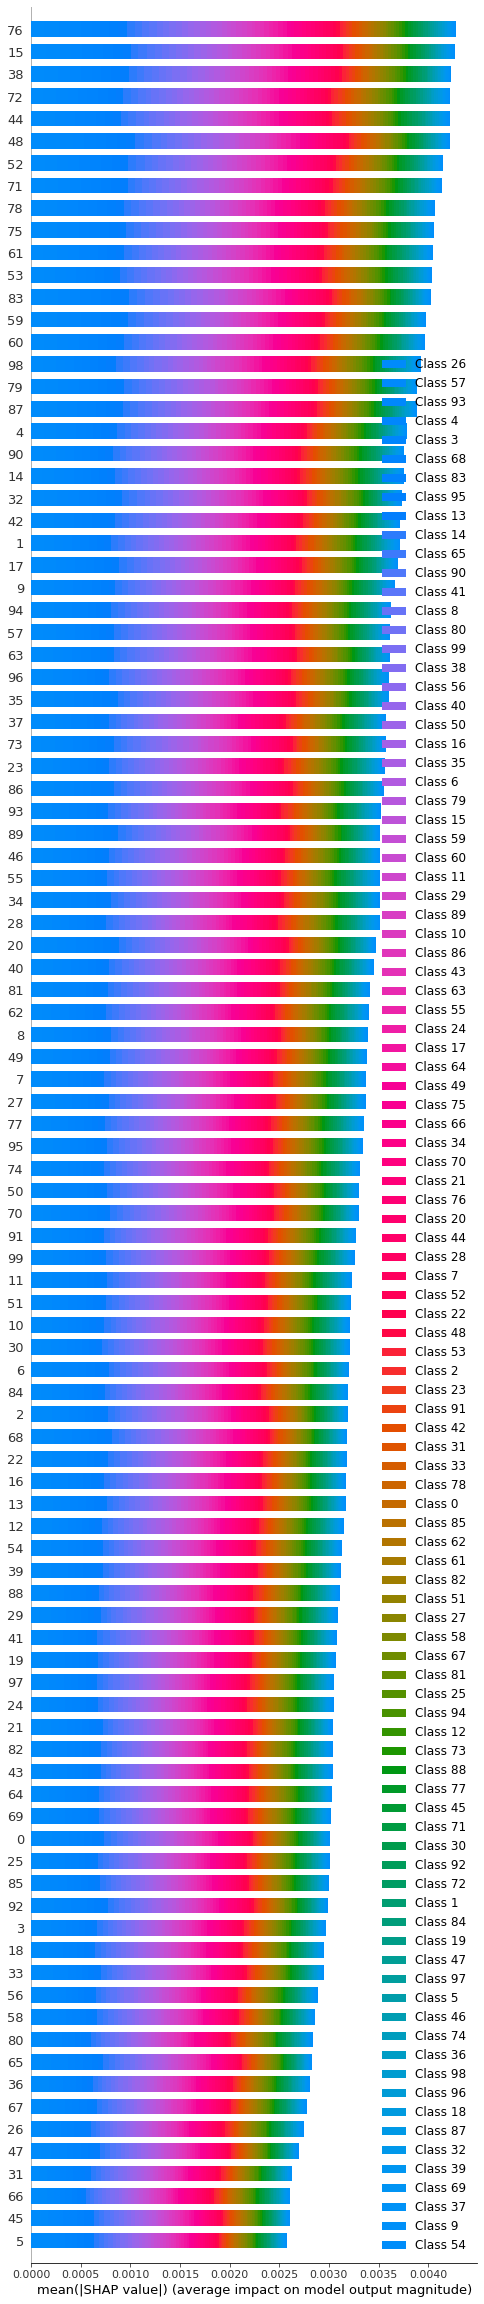

In [38]:
shap.summary_plot(shap_values, features = anomaly, plot_type='bar', max_display=anomaly.shape[1])

In [39]:
anomaly.columns[np.argsort(np.abs(shap_values).mean(0))]
import numpy as np
vals= np.abs(shap_values).mean(0)

feature_importance = pd.DataFrame(list(zip(anomaly.columns, sum(vals))), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)
feature_importance

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


,col_name,feature_importance_vals
76,76,0.006122
15,15,0.006106
38,38,0.006044
72,72,0.006036
44,44,0.006032
...,...,...
47,47,0.003853
31,31,0.003761
66,66,0.003734
45,45,0.003731


<h3>Extract high importance features</h3>

In [40]:
extracted_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.283287,0.451176,0.218485,0.213046,0.400319,0.235001,0.296112,0.300053,0.197311,0.338646,...,0.205776,0.123888,0.147348,0.239011,0.512866,0.226248,0.317155,0.259947,0.379701,0.318350
1,0.221462,0.318331,0.188019,0.145136,0.909655,0.272850,0.308047,0.273128,0.299880,0.476233,...,0.236951,0.431608,0.080186,0.310714,0.939571,0.220997,0.750169,0.217581,0.469106,0.249738
2,0.154589,0.719041,0.189095,0.244297,0.181735,0.314539,0.208079,0.281563,0.000000,0.327969,...,0.156836,0.281078,0.136328,0.274223,0.406799,0.214893,0.796495,0.299378,0.444614,0.203111
3,0.401187,0.219970,0.278728,0.127873,0.250390,0.196816,0.241549,0.269566,0.532499,0.393988,...,0.591490,0.149833,0.113135,0.549765,0.851685,0.281443,0.248780,0.239755,0.245518,0.257796
4,0.437060,0.289934,0.231931,0.222376,0.576593,0.207071,0.268696,0.288996,0.391301,0.399456,...,0.207669,0.236932,0.075724,0.275853,0.476610,0.202678,0.323716,0.434055,0.325602,0.581118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,0.237460,0.483732,0.342058,0.214106,0.300097,0.230288,0.608661,0.242046,0.231276,0.416538,...,0.186592,0.191593,0.084061,0.303242,0.524701,0.281441,0.199067,0.226343,0.314113,0.519872
1177,0.377429,0.219859,0.232973,0.427253,0.206252,0.236534,0.281416,0.294544,0.345046,0.364210,...,0.184849,0.319788,0.150700,0.269784,0.363756,0.203613,0.237000,0.221228,0.328102,0.338025
1178,0.291410,0.282381,0.169407,0.141536,0.348753,0.418370,0.464327,0.485951,0.367649,0.245314,...,0.571592,0.484714,0.131002,0.891725,0.180105,0.548222,0.253368,0.382392,0.399778,0.504830
1179,0.178110,0.449582,0.250717,0.539590,0.224672,0.219690,0.234105,0.715225,0.156911,0.308800,...,0.335322,0.101360,0.274880,0.308925,0.132133,0.268441,0.389850,0.201183,0.173446,0.211528


In [ ]:
for i in range(2,100):
    it = feature_importance.iloc[:i,0]
    it = it.to_list()
    explained_train = extracted_train_scaled[it]
    explained_test = extracted_test_scaled[it]
    model(it)

In [74]:
it = feature_importance.iloc[:60,0]

In [75]:
it = it.to_list()
it

[76,
 15,
 38,
 72,
 44,
 48,
 52,
 71,
 78,
 75,
 61,
 53,
 83,
 59,
 60,
 98,
 79,
 87,
 4,
 90,
 14,
 32,
 42,
 1,
 17,
 9,
 94,
 57,
 63,
 96,
 35,
 37,
 73,
 23,
 86,
 93,
 89,
 46,
 55,
 34,
 28,
 20,
 40,
 81,
 62,
 8,
 49,
 7,
 27,
 77,
 95,
 74,
 50,
 70,
 91,
 99,
 11,
 51,
 10,
 30]

In [77]:
explained_train = extracted_train_scaled[it]

explained_test = extracted_test_scaled[it]

In [89]:
m = 64
n_z = 2
n_epoch = 10

def model(it):
    # Q(z|X) -- encoder
    inputs = Input(shape=(len(it),))
    h_q = Dense(512, activation='relu')(inputs)
    h_q = Dense(1024, activation='relu')(inputs)
    decoder_hidden = Dense(2048, activation='relu')
    mu = Dense(n_z, activation='linear')(h_q)
    log_sigma = Dense(n_z, activation='linear')(h_q)


    def sample_z(args):
    #     z_mean, z_log_sigma = args
    #     batch_size = tf.shape(z_mean)[0]
    #     epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
    #     return z_mean + K.exp(0.5 * z_log_sigma) * epsilon

        mu, log_sigma = args
        batch_size = tf.shape(mu)[0]
        eps = K.random_normal(shape=(batch_size, n_z), mean=0., stddev=1.)
        return mu + K.exp(log_sigma / 2) * eps


    # Sample z ~ Q(z|X)
    z = Lambda(sample_z)([mu, log_sigma])

    # P(X|z) -- decoder
    decoder_hidden = Dense(2048, activation='relu')
    decoder_hidden = Dense(1024, activation='relu')
    decoder_hidden = Dense(512, activation='relu')
    decoder_out = Dense(len(it), activation='sigmoid')

    h_p = decoder_hidden(z)
    outputs = decoder_out(h_p)

    # Overall VAE model, for reconstruction and training
    vae = Model(inputs, outputs)

    # Encoder model, to encode input into latent variable
    # We use the mean as the output as it is the center point, the representative of the gaussian
    encoder = Model(inputs, mu)

    # Generator model, generate new data given latent variable z
    d_in = Input(shape=(n_z,))
    d_h = decoder_hidden(d_in)
    d_out = decoder_out(d_h)
    decoder = Model(d_in, d_out)

    def vae_loss(recon_x, x):
        """ Calculate loss = reconstruction loss + KL loss for each data in minibatch """
        # E[log P(X|z)]
        recon = K.sum(K.binary_crossentropy(recon_x, x), axis=1)
        # D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
        kl = 0.5 * K.sum(K.exp(log_sigma) + K.square(mu) - 1. - log_sigma, axis=1)

        return recon + kl

    vae.compile(optimizer='adam', loss=vae_loss)
    vae.fit(explained_train, explained_train, batch_size=m, epochs=100, validation_data=(explained_test, explained_test))
    explained_test = []

In [79]:
# import tensorflow as tf
# tf.compat.v1.disable_eager_execution()
# from tensorflow.keras.layers import Input, Dense, Lambda
# from tensorflow.keras.models import Model
# from keras.metrics import binary_crossentropy
# from tensorflow.keras.callbacks import LearningRateScheduler

# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow.keras.backend as K
# import tensorflow as tf


# m = 64
# n_z = 2
# n_epoch = 10


# # Q(z|X) -- encoder
# inputs = Input(shape=(len(it),))
# h_q = Dense(512, activation='relu')(inputs)
# h_q = Dense(1024, activation='relu')(inputs)
# decoder_hidden = Dense(2048, activation='relu')
# mu = Dense(n_z, activation='linear')(h_q)
# log_sigma = Dense(n_z, activation='linear')(h_q)


# def sample_z(args):
# #     z_mean, z_log_sigma = args
# #     batch_size = tf.shape(z_mean)[0]
# #     epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
# #     return z_mean + K.exp(0.5 * z_log_sigma) * epsilon

#     mu, log_sigma = args
#     batch_size = tf.shape(mu)[0]
#     eps = K.random_normal(shape=(batch_size, n_z), mean=0., stddev=1.)
#     return mu + K.exp(log_sigma / 2) * eps


# # Sample z ~ Q(z|X)
# z = Lambda(sample_z)([mu, log_sigma])

# # P(X|z) -- decoder
# decoder_hidden = Dense(2048, activation='relu')
# decoder_hidden = Dense(1024, activation='relu')
# decoder_hidden = Dense(512, activation='relu')
# decoder_out = Dense(len(it), activation='sigmoid')

# h_p = decoder_hidden(z)
# outputs = decoder_out(h_p)

# # Overall VAE model, for reconstruction and training
# vae = Model(inputs, outputs)

# # Encoder model, to encode input into latent variable
# # We use the mean as the output as it is the center point, the representative of the gaussian
# encoder = Model(inputs, mu)

# # Generator model, generate new data given latent variable z
# d_in = Input(shape=(n_z,))
# d_h = decoder_hidden(d_in)
# d_out = decoder_out(d_h)
# decoder = Model(d_in, d_out)

# def vae_loss(recon_x, x):
#     """ Calculate loss = reconstruction loss + KL loss for each data in minibatch """
#     # E[log P(X|z)]
#     recon = K.sum(K.binary_crossentropy(recon_x, x), axis=1)
#     # D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
#     kl = 0.5 * K.sum(K.exp(log_sigma) + K.square(mu) - 1. - log_sigma, axis=1)

#     return recon + kl

# vae.compile(optimizer='adam', loss=vae_loss)
# vae.fit(explained_train, explained_train, batch_size=m, epochs=100, validation_data=(explained_test, explained_test))

Train on 1181 samples, validate on 582 samples
Epoch 1/100
1181/1181 [==============================] - 1s 551us/sample - loss: 39.7322 - val_loss: 38.1574
Epoch 2/100
  64/1181 [>.............................] - ETA: 0s - loss: 38.0857

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1181/1181 [==============================] - 0s 230us/sample - loss: 37.3804 - val_loss: 37.2904
Epoch 3/100
1181/1181 [==============================] - 0s 223us/sample - loss: 36.9127 - val_loss: 37.1415
Epoch 4/100
1181/1181 [==============================] - 0s 223us/sample - loss: 36.7471 - val_loss: 37.1010
Epoch 5/100
1181/1181 [==============================] - 0s 220us/sample - loss: 36.6529 - val_loss: 36.9777
Epoch 6/100
1181/1181 [==============================] - 0s 228us/sample - loss: 36.5964 - val_loss: 36.9265
Epoch 7/100
1181/1181 [==============================] - 0s 230us/sample - loss: 36.5512 - val_loss: 36.9198
Epoch 8/100
1181/1181 [==============================] - ETA: 0s - loss: 36.52 - 0s 226us/sample - loss: 36.5361 - val_loss: 36.9050
Epoch 9/100
1181/1181 [==============================] - 0s 229us/sample - loss: 36.5226 - val_loss: 36.8845
Epoch 10/100
1181/1181 [==============================] - 0s 227us/sample - loss: 36.5105 - val_loss: 36.8827
Epoch 

In [82]:
explained_error = mse_error(explained_test)

explained_error_arr= np.array(explained_error)
explained_error_df = pd.DataFrame(explained_error_arr)

test_explained_error = explained_error_df.iloc[:,0]
test_explained_error

0      403.0
1       16.0
2      549.0
3      175.0
4       22.0
       ...  
577    286.0
578    190.0
579    272.0
580    450.0
581    545.0
Name: 0, Length: 582, dtype: float64

In [83]:
test_explained_error = test_explained_error.astype(int)

test_explained_error_head = test_explained_error.head(143)

test_explained_error_head = test_explained_error_head.to_numpy()

In [84]:
explained_anomaly = explained_test.iloc[test_explained_error_head]

In [85]:
de_test_explained = extracted_test_scaled.copy()
de_test_explained['attack'] = 0
de_test_explained.loc[test_explained_error_head,'attack']= 1

In [86]:
y_de_explained = de_test_explained['attack']
y_de_explained

0      0
1      0
2      0
3      0
4      0
      ..
577    1
578    1
579    0
580    0
581    1
Name: attack, Length: 582, dtype: int64

In [87]:
from sklearn.metrics import f1_score
f1_score(y_test, y_de_explained, average='weighted')

0.8034052243743487